# Predicting Medical Insurance Costs

## Problem Definition
For this project, we'll be looking at the <a href="https://www.kaggle.com/datasets/mirichoi0218/insurance?resource=download">Medical Cost Data Set</a> from Kaggle. This dataset contains information on individual medical insurance bills. Each bill is associated with some demographic and personal characteristics of the person who received it.

For our regression problem, we're interested in how these different characteristics relate to the **total medical cost**. It's a continuous, positive number, which makes it a good candidate for a linear regression. For this project, we want to construct the best possible predictive model for the cost, given some information about the patient. Predicting medical costs is an important task because it allows hospitals to predict revenue and plan necessary procedures needed by its patient population.

The attributes are defined as follows:
- **age**: age of primary beneficiary
- **sex**: insurance contractor gender, female, male
- **bmi**: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- **children**: Number of children covered by health insurance / Number of dependents
- **smoker**: Smoking
- **region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **charges**: Individual medical costs billed by health insurance

### Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor,AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import LabelEncoder,StandardScaler

### Load dataset

In [2]:
insurance= pd.read_csv("insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Analyze Data

### Descriptive statistics

In [3]:
# shape
insurance.shape

(1338, 7)

We have `1338` instances to work with and can confirm the data has `7` attributes including the output attribute **charges**.

In [4]:
# types
print(insurance.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


We can see that the data types of the attributes are mixed: some are integers, some are floats, and some are objects.

In [5]:
# head
insurance.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


We can confirm that the scales for the attributes are all over the place because of the differing units. We may benefit from some transforms later on.

In [6]:
# descriptions
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We now have a better feeling for how different the attributes are. The min and max values as well are the means vary a lot. We are likely going to get better results by rescaling the data in some way.

In [7]:
# correlation
insurance.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


We can see that many of the attributes don't have a strong correlation.

### Data visualizations

Let’s look at visualizations of individual attributes. It is often useful to look at your data using multiple different visualizations in order to spark ideas. Let’s look at histograms of each attribute to get a sense of the data distributions.

In [8]:
numeric_dataset= insurance.select_dtypes(include=["float","int64"])
numeric_dataset.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


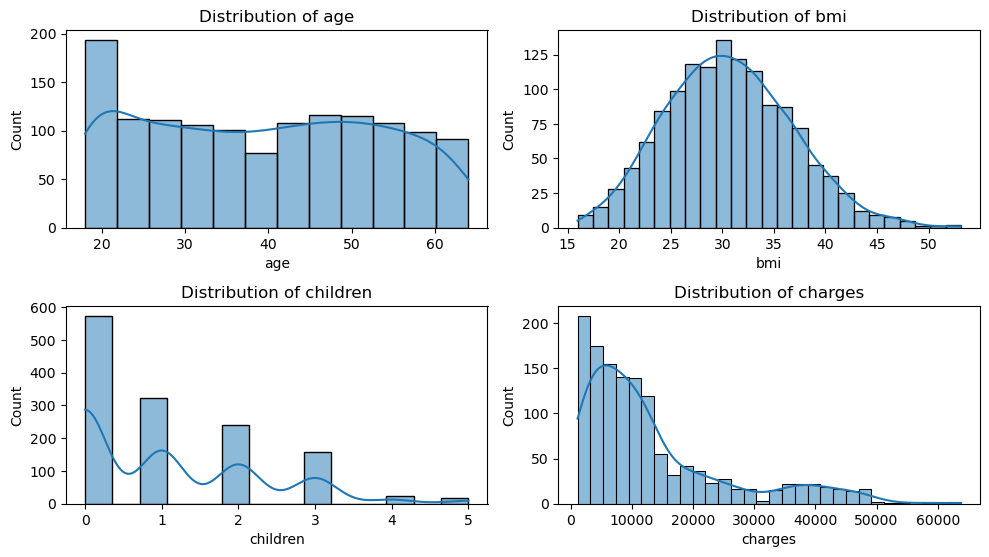

In [9]:
#histograms
plt.figure(figsize=(10,8))
for i, colums in enumerate(numeric_dataset):
    plt.subplot(3,2,i+1)
    sns.histplot(data=numeric_dataset,x=colums,kde=True)
    plt.title(f"Distribution of {colums}")
plt.tight_layout()
plt.show()

Let’s look at the data with box and whisker plots of each attribute

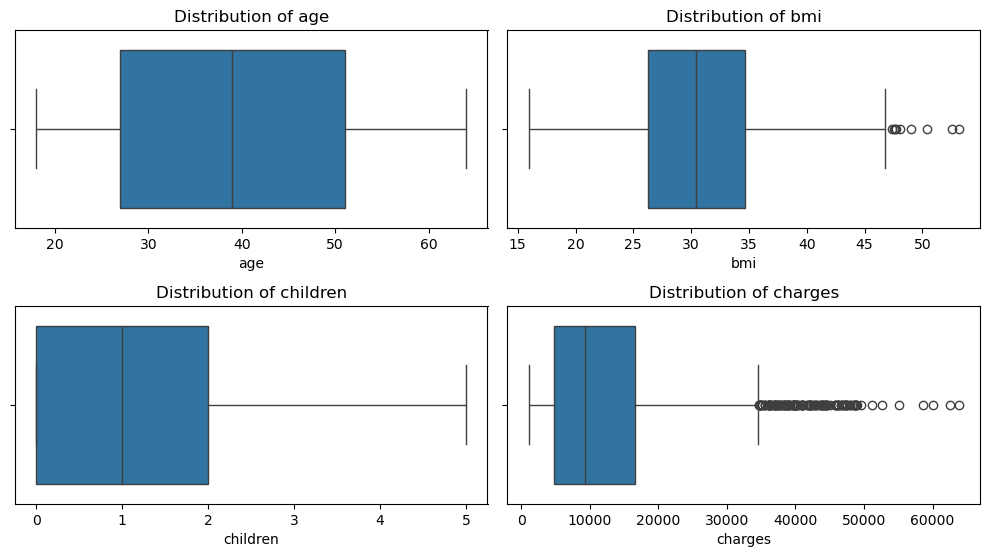

In [10]:
plt.figure(figsize=(10,8))
for i, colums in enumerate(numeric_dataset):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=numeric_dataset,x=colums)
    plt.title(f"Distribution of {colums}")
plt.tight_layout()
plt.show()

This helps point out the skew in many distributions so much so that data looks like outliers.

Let’s look at some visualizations of the interactions between variables. The best place to start is a scatter plot matrix.

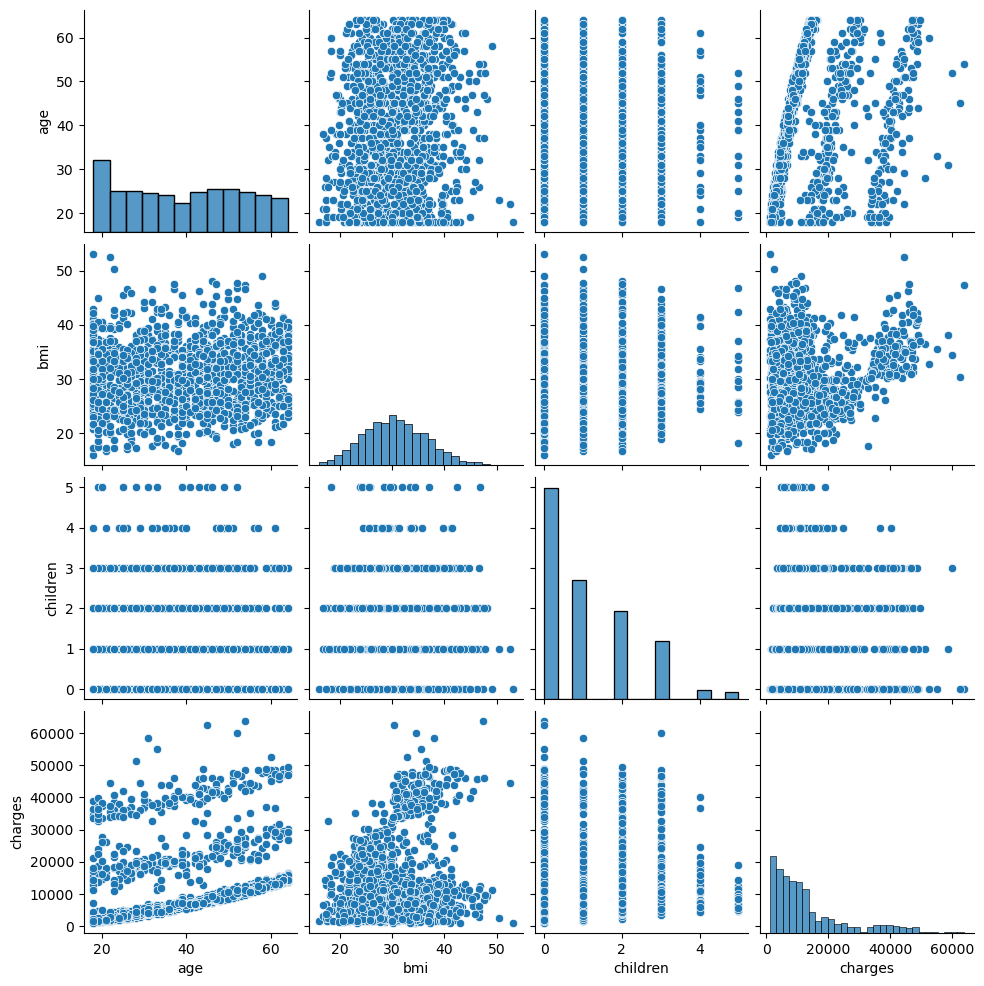

In [11]:
# scatter plot matrix
sns.pairplot(numeric_dataset)
plt.show()

Let’s also visualize the correlations between the attributes.

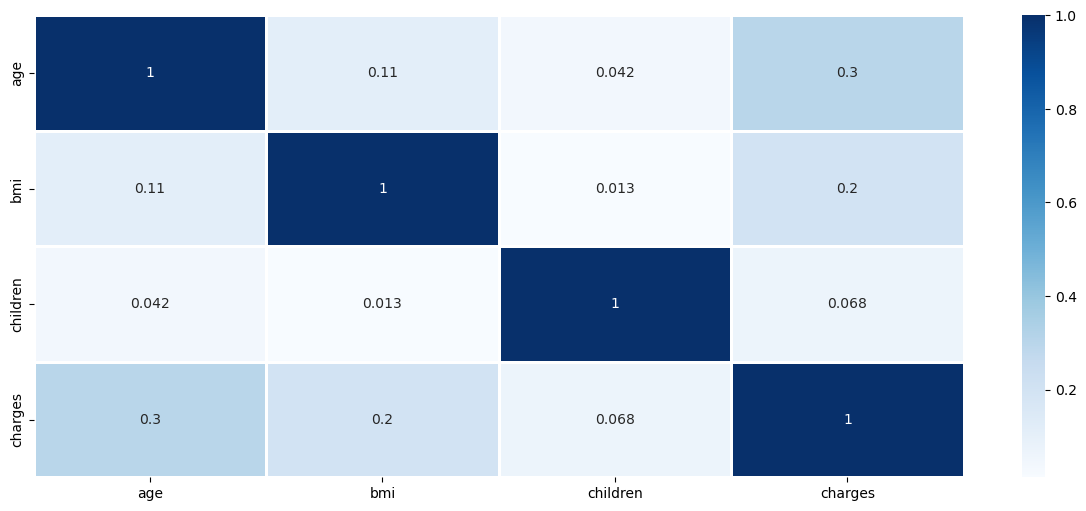

In [12]:
plt.figure(figsize=(15,6))
sns.heatmap(numeric_dataset.corr(),cmap="Blues",linewidths=0.9,annot=True)
plt.show()

## Prepare Data

### Data Cleaning

In [13]:
# Check for missing values
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Data Transforms

In [14]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
insurance["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [16]:
insurance["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [17]:
insurance["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [18]:
# performing label encoding on categorical variables
label_encoder = LabelEncoder()

In [19]:
# sex column label encoding
insurance["sex"]= label_encoder.fit_transform(insurance["sex"])

In [20]:
insurance["sex"].value_counts()

sex
1    676
0    662
Name: count, dtype: int64

In [21]:
# smoker column label encoding
insurance["smoker"]= label_encoder.fit_transform(insurance["smoker"])

In [22]:
insurance["smoker"].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

In [23]:
# region column label encoding 
insurance["region"]= label_encoder.fit_transform(insurance["region"])

In [24]:
insurance["region"].value_counts()

region
2    364
3    325
1    325
0    324
Name: count, dtype: int64

In [25]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Feature Selections

In [26]:
X= insurance.drop(columns="charges",axis=1)
y= insurance["charges"]

## Evaluate Algorithms

### Split-out validation dataset

We will use 80% of the dataset for modeling and hold back 20% for validation.

In [27]:
# Split-out validation dataset
X_train,X_validation,y_train,y_validation=train_test_split(X,y,test_size=0.2,random_state=45)

In [28]:
len(X_train) + len(X_validation)== len(insurance)

True

### Test options and evaluation metric

We have no idea what algorithms will do well on this problem. Gut feel suggests regression algorithms like Linear Regression and ElasticNet may do well. It is also possible that decision trees and even SVM may do well. I have no idea. Let’s design our test harness. We will use 10-fold cross validation. The dataset is not too small and this is a good standard test harness configuration. We will evaluate algorithms using the Mean Squared Error (MSE) metric. MSE will give a gross idea of how wrong all predictions are (0 is perfect).

In [29]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring ='neg_mean_squared_error'

### Spot Check Algorithms

Let’s create a baseline of performance on this problem and spot-check a number of different algorithms. We will select a suite of different algorithms capable of working on this regression problem. The six algorithms selected include:
- **Linear Algorithms**: Linear Regression (LR), Lasso Regression (LASSO) and ElasticNet (EN).
- **Nonlinear Algorithms**: Classification and Regression Trees (CART), Support Vector Regression (SVR) and k-Nearest Neighbors (KNN).


In [30]:
# Spot-Check Algorithms
models=[]
models.append(("LR",LinearRegression()))
models.append(("LASSO",Lasso()))
models.append(("EN",ElasticNet()))
models.append(("KNN",KNeighborsRegressor()))
models.append(("CART",DecisionTreeRegressor()))
models.append(("SVR",SVR()))

In [31]:
models

[('LR', LinearRegression()),
 ('LASSO', Lasso()),
 ('EN', ElasticNet()),
 ('KNN', KNeighborsRegressor()),
 ('CART', DecisionTreeRegressor()),
 ('SVR', SVR())]

The algorithms all use default tuning parameters. Let’s compare the algorithms. We will display the mean and standard deviation of MSE for each algorithm as we calculate it and collect the results for use later.

In [32]:
# evaluate each model in turn
results=[]
names=[]
for name, model in models:
    kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
    cv_results= cross_val_score(model,X=X_train,y=y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f"Model Name: {name}  (Mean: {cv_results.mean()})   (Std: {cv_results.std()})")

Model Name: LR  (Mean: -36699614.13497479)   (Std: 7087360.065328904)
Model Name: LASSO  (Mean: -36697509.454581834)   (Std: 7085165.623996055)
Model Name: EN  (Mean: -91298145.22016926)   (Std: 11126447.651943227)
Model Name: KNN  (Mean: -134137425.52669469)   (Std: 17365451.430937134)
Model Name: CART  (Mean: -43100604.79923793)   (Std: 11636057.444170436)
Model Name: SVR  (Mean: -166226713.74468923)   (Std: 26527387.314964857)


It looks like **LR** has the lowest **MSE**, followed closely by **LASSO**.

### Compare Algorithms

Let’s take a look at the distribution of scores across all cross validation folds by algorithm.

/var/folders/bc/bq_nk_xd5rb59qd7g9_htjdm0000gn/T/ipykernel_28377/239421911.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(names)


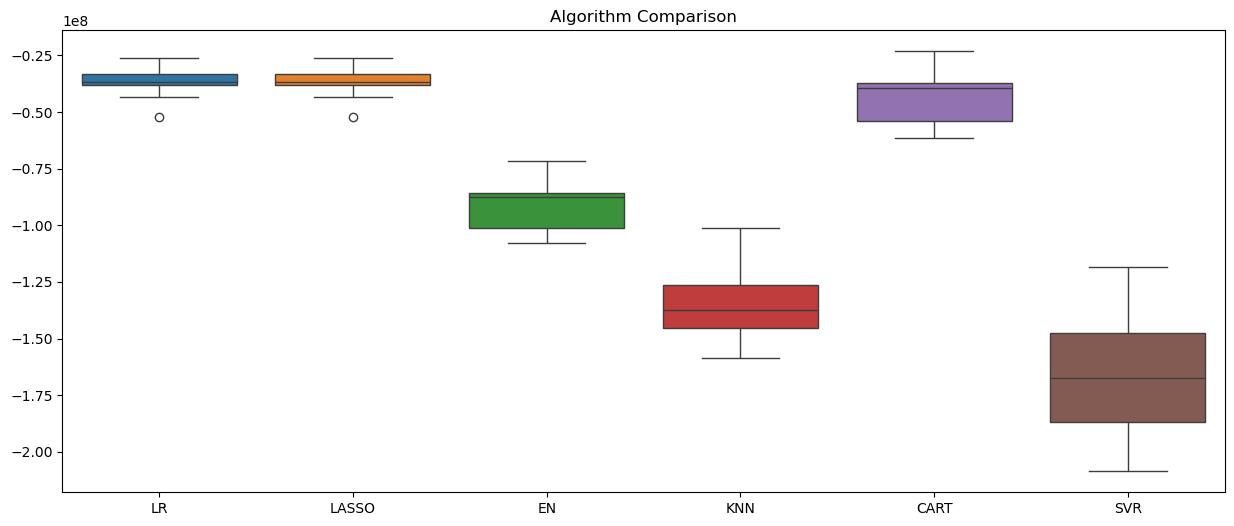

In [33]:
fig,ax=plt.subplots(figsize=(15,6))
ax=sns.boxplot(results)
ax.set_xticklabels(names)
plt.title("Algorithm Comparison")
plt.show()

We can see similar distributions for the regression algorithms and perhaps a tighter distribution of scores for **LR**.

### Standardization
We suspect that the differing scales of the raw data may be negatively impacting the skill of some of the algorithms. Let’s evaluate the same algorithms with a standardized copy of the dataset. This is where the data is transformed such that each attribute has a mean value of zero and a standard deviation of 1. We also need to avoid data leakage when we transform the data. A good way to avoid leakage is to use pipelines that standardize the data and build the model for each fold in the cross validation test harness. That way we can get a fair estimation of how each model with standardized data might perform on unseen data.


In [34]:
# Standardize the dataset
pipelines = []
pipelines.append(("ScaledLR",Pipeline([("Scaled",StandardScaler()),("LR",LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())])))

In [35]:
pipelines

[('ScaledLR',
  Pipeline(steps=[('Scaled', StandardScaler()), ('LR', LinearRegression())])),
 ('ScaledLASSO',
  Pipeline(steps=[('Scaler', StandardScaler()), ('LASSO', Lasso())])),
 ('ScaledEN',
  Pipeline(steps=[('Scaler', StandardScaler()), ('EN', ElasticNet())])),
 ('ScaledKNN',
  Pipeline(steps=[('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])),
 ('ScaledCART',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('CART', DecisionTreeRegressor())])),
 ('ScaledSVR', Pipeline(steps=[('Scaler', StandardScaler()), ('SVR', SVR())]))]

In [36]:
results = []
names = []
for name, model in pipelines:
  kfold = KFold(n_splits=num_folds,random_state=seed,shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"Model Name: {name}  (Mean: {cv_results.mean()})   (Std: {cv_results.std()})")

Model Name: ScaledLR  (Mean: -36699614.13497479)   (Std: 7087360.065328903)
Model Name: ScaledLASSO  (Mean: -36698584.39851272)   (Std: 7086624.476431356)
Model Name: ScaledEN  (Mean: -49144514.92834616)   (Std: 8311835.348912884)
Model Name: ScaledKNN  (Mean: -28352182.68482045)   (Std: 3890855.8957217364)
Model Name: ScaledCART  (Mean: -39623926.39411358)   (Std: 10621727.823077444)
Model Name: ScaledSVR  (Mean: -165585977.8091721)   (Std: 26450216.534518044)


We can see that scaling did have an effect on **KNN**, driving the error lower than the other models.

Let’s take a look at the distribution of the scores across the cross validation folds.

/var/folders/bc/bq_nk_xd5rb59qd7g9_htjdm0000gn/T/ipykernel_28377/239421911.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(names)


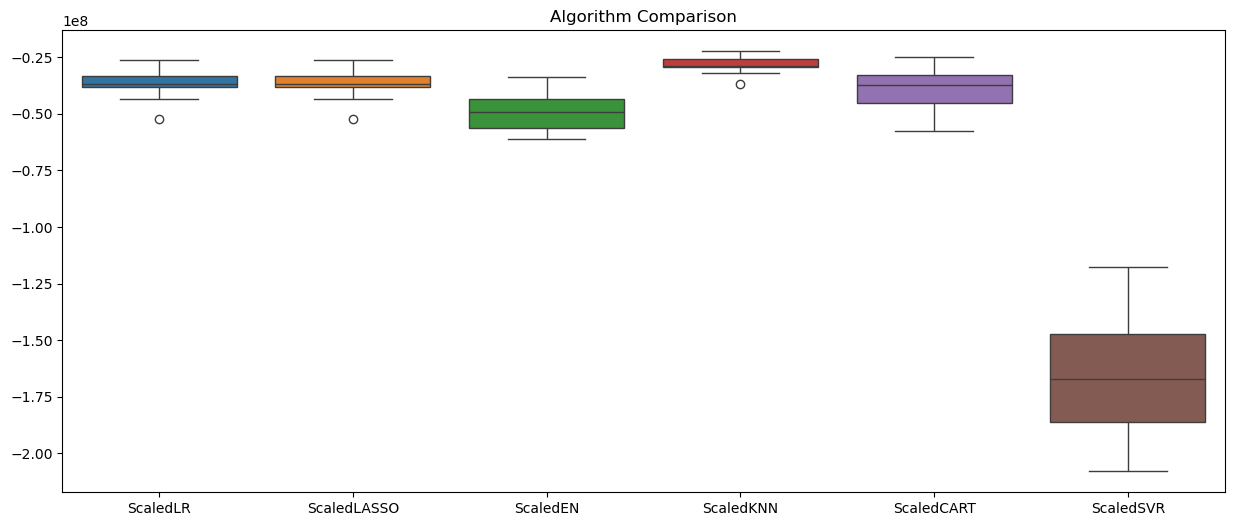

In [37]:
fig,ax=plt.subplots(figsize=(15,6))
ax=sns.boxplot(results)
ax.set_xticklabels(names)
plt.title("Algorithm Comparison")
plt.show()

We can see that **KNN** has both a tight distribution of error and has the lowest score.

## Improve Accuracy

### Algorithm Tuning

We know from the results in the previous section that KNN achieves good results on a scaled version of the dataset. But can it do better. The default value for the number of neighbors in KNN is 7. We can use a grid search to try a set of different numbers of neighbors and see if we can improve the score. The below example tries odd k values from 1 to 21, an arbitrary range covering a known good value of 7. Each k value (n neighbors) is evaluated using 10-fold cross validation on a standardized copy of the training dataset.


In [38]:
scaler= StandardScaler().fit(X_train)
rescaledX= scaler.transform(X_train)
k_values= np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model=KNeighborsRegressor()
kfold=KFold(n_splits=num_folds,random_state=seed,shuffle=True)
grid= GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result= grid.fit(rescaledX,y_train)

In [39]:
grid_result

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21])},
             scoring='neg_mean_squared_error')

We can display the mean and standard deviation scores as well as the best performing value for k below.


In [40]:
print(f"Best: {grid_result.best_score_}, {grid_result.best_params_}")

Best: -27291914.63629238, {'n_neighbors': 7}


In [41]:
means = grid_result.cv_results_['mean_test_score']
means

array([-42809843.95556236, -29331933.60052733, -28246844.11326713,
       -27291914.63629238, -27389428.28792156, -27320737.07357704,
       -27811816.6044732 , -28232548.42268294, -28548350.27004657,
       -28408158.72587609, -28131939.30396749])

In [42]:
stds = grid_result.cv_results_['std_test_score']
stds

array([4417863.96927185, 3903581.97582228, 4130766.68182183,
       4240227.83774434, 4464237.68867278, 4441307.00249323,
       4624651.30700145, 4717311.37538551, 5201973.71311405,
       5307343.40474947, 5401102.04091073])

In [43]:
params = grid_result.cv_results_['params']
params

[{'n_neighbors': 1},
 {'n_neighbors': 3},
 {'n_neighbors': 5},
 {'n_neighbors': 7},
 {'n_neighbors': 9},
 {'n_neighbors': 11},
 {'n_neighbors': 13},
 {'n_neighbors': 15},
 {'n_neighbors': 17},
 {'n_neighbors': 19},
 {'n_neighbors': 21}]

In [44]:
print(f"Best: {grid_result.best_score_}, {grid_result.best_params_}\n")
for mean, stdev, param in zip(means, stds, params):
    print(f"Mean: {round(mean,6)}, Std: {round(stdev,6)}, {param}")

Best: -27291914.63629238, {'n_neighbors': 7}

Mean: -42809843.955562, Std: 4417863.969272, {'n_neighbors': 1}
Mean: -29331933.600527, Std: 3903581.975822, {'n_neighbors': 3}
Mean: -28246844.113267, Std: 4130766.681822, {'n_neighbors': 5}
Mean: -27291914.636292, Std: 4240227.837744, {'n_neighbors': 7}
Mean: -27389428.287922, Std: 4464237.688673, {'n_neighbors': 9}
Mean: -27320737.073577, Std: 4441307.002493, {'n_neighbors': 11}
Mean: -27811816.604473, Std: 4624651.307001, {'n_neighbors': 13}
Mean: -28232548.422683, Std: 4717311.375386, {'n_neighbors': 15}
Mean: -28548350.270047, Std: 5201973.713114, {'n_neighbors': 17}
Mean: -28408158.725876, Std: 5307343.404749, {'n_neighbors': 19}
Mean: -28131939.303967, Std: 5401102.040911, {'n_neighbors': 21}


### Ensembles

Another way that we can improve the performance of algorithms on this problem is by using ensemble methods. In this section we will evaluate four different ensemble machine learning algorithms, two boosting and two bagging methods:
- **Boosting Methods**: AdaBoost (AB) and Gradient Boosting (GBM). 
- **Bagging Methods**: Random Forests (RF) and Extra Trees (ET).

We will use the same test harness as before, 10-fold cross validation and pipelines that standardize the training data for each fold.

In [45]:
#ensembles
ensembles=[]
ensembles.append(("ScaledAB", Pipeline([("Scaler",StandardScaler()),("AB",AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM',GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET',ExtraTreesRegressor())])))

In [46]:
ensembles

[('ScaledAB',
  Pipeline(steps=[('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])),
 ('ScaledGBM',
  Pipeline(steps=[('Scaler', StandardScaler()),
                  ('GBM', GradientBoostingRegressor())])),
 ('ScaledRF',
  Pipeline(steps=[('Scaler', StandardScaler()), ('RF', RandomForestRegressor())])),
 ('ScaledET',
  Pipeline(steps=[('Scaler', StandardScaler()), ('ET', ExtraTreesRegressor())]))]

In [47]:
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds,random_state=seed,shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"Model Name: {name}  (Mean: {cv_results.mean()})   (Std: {cv_results.std()})")

Model Name: ScaledAB  (Mean: -25545565.38571112)   (Std: 4023150.015340813)
Model Name: ScaledGBM  (Mean: -21041321.372236256)   (Std: 5319312.297507176)
Model Name: ScaledRF  (Mean: -23897700.348011978)   (Std: 4384643.434306959)
Model Name: ScaledET  (Mean: -26301801.455509953)   (Std: 3922472.187641624)


Running the example calculates the mean squared error for each method using the default parameters. We can see that we’re generally getting better scores than our linear and nonlinear algorithms in previous sections.

We can also plot the distribution of scores across the cross validation folds.


/var/folders/bc/bq_nk_xd5rb59qd7g9_htjdm0000gn/T/ipykernel_28377/239421911.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(names)


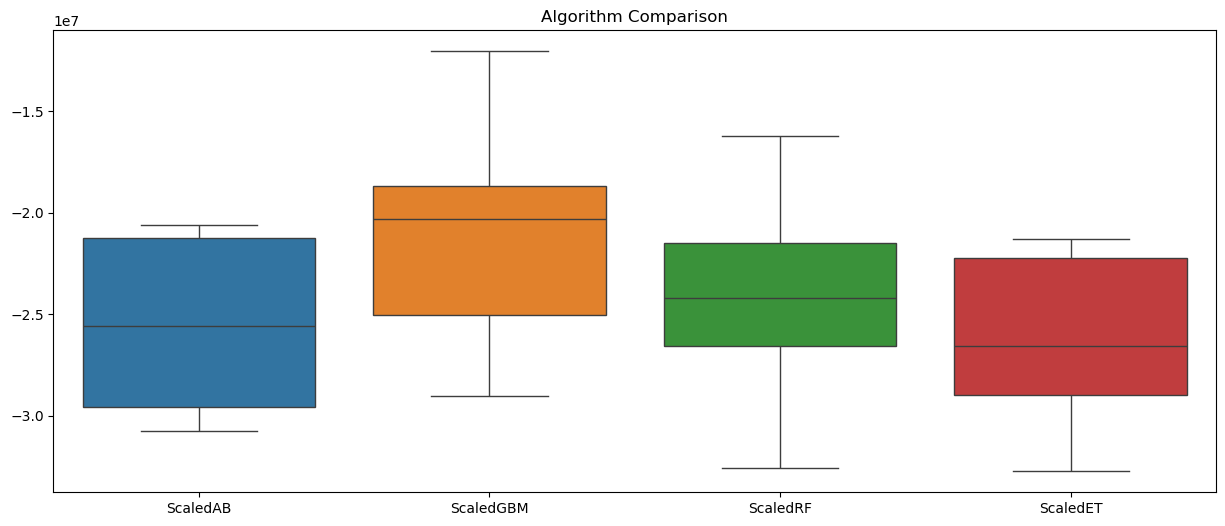

In [48]:
fig,ax=plt.subplots(figsize=(15,6))
ax=sns.boxplot(results)
ax.set_xticklabels(names)
plt.title("Algorithm Comparison")
plt.show()

It looks like Gradient Boosting has a better mean score.

### Tune Ensemble Methods

The default number of boosting stages to perform (n estimators) is 100. This is a good candidate parameter of Gradient Boosting to tune. Often, the larger the number of boosting stages, the better the performance but the longer the training time. In this section we will look at tuning the number of stages for gradient boosting. Below we define a parameter grid n estimators values from 50 to 400 in increments of 50. Each setting is evaluated using 10-fold cross validation.

In [49]:
# Tune scaled GBM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,250,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold = KFold(n_splits=num_folds,random_state=seed,shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, y_train)

In [50]:
grid_result

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=GradientBoostingRegressor(random_state=7),
             param_grid={'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400])},
             scoring='neg_mean_squared_error')

As before, we can summarize the best configuration and get an idea of how performance changed with each different configuration.

In [51]:
print(f"Best: {grid_result.best_score_}, {grid_result.best_params_}\n")
means= grid_result.cv_results_["mean_test_score"]
stdev= grid_result.cv_results_["std_test_score"]
params= grid_result.cv_results_["params"]
for mean, stdev, param in zip(means, stds, params):
    print(f"Mean: {round(mean,6)}, Std: {round(stdev,6)}, {param}")

Best: -20218408.289252676, {'n_estimators': 50}

Mean: -20218408.289253, Std: 4417863.969272, {'n_estimators': 50}
Mean: -21006828.895887, Std: 3903581.975822, {'n_estimators': 100}
Mean: -22084194.972649, Std: 4130766.681822, {'n_estimators': 150}
Mean: -22808476.195971, Std: 4240227.837744, {'n_estimators': 200}
Mean: -23576889.720688, Std: 4464237.688673, {'n_estimators': 250}
Mean: -24160642.637913, Std: 4441307.002493, {'n_estimators': 300}
Mean: -24742241.017561, Std: 4624651.307001, {'n_estimators': 350}
Mean: -25279589.975576, Std: 4717311.375386, {'n_estimators': 400}


We can see that the best configuration was **n_estimators=50** resulting in a mean squared error of **-20218408.289253**

## Finalize Model

In this section we will finalize the gradient boosting model and evaluate it on our hold out validation dataset. First we need to prepare the model and train it on the entire training dataset. This includes standardizing the training dataset before training.

In [52]:
# prepare the model
scaler=StandardScaler().fit(X_train)
rescaledX= scaler.transform(X_train)
model=GradientBoostingRegressor(random_state=seed,n_estimators=50)
model.fit(rescaledX,y_train)

GradientBoostingRegressor(n_estimators=50, random_state=7)

model.

### Predictions on validation dataset

We can then scale the inputs for the validation dataset and generate predictions.

In [53]:
# transform the validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
mae= mean_squared_error(y_validation,predictions)
r2= r2_score(y_validation,predictions)
print(f"mae: {mae}")
print(f"R2 Score: {r2}")

mae: 20687795.35366728
R2 Score: 0.8401470228472929


We can see that the estimated mean squared error is 20687795.35366728 , close to our estimate of 20218408.289252676.

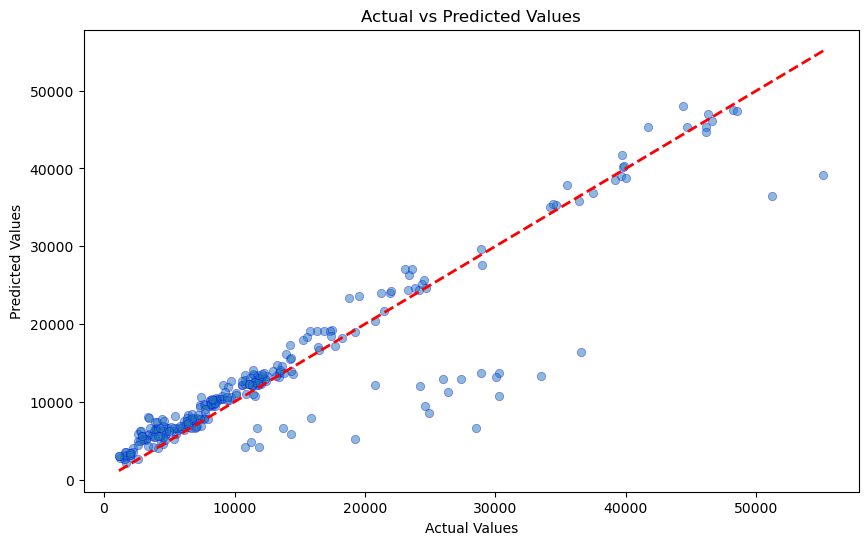

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_validation, y=predictions, edgecolor='b', alpha=0.5)
# Add a line for the perfect predictions
plt.plot([y_validation.min(), y_validation.max()], [y_validation.min(), y_validation.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


### Save model for later use

In [55]:
import joblib

In [56]:
joblib.dump(model, 'insurance_costs_predictor_model.pkl')

['insurance_costs_predictor_model.pkl']